In [89]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import requests
from datetime import datetime, timedelta

zones = ['AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']

In [154]:
f_init = np.zeros(len(df_observed_february.index))

border_flows_obs = {
    'AT-CZ': f_init.copy(), 'AT-DE': f_init.copy(), 'AT-HU': f_init.copy(), 'AT-SI': f_init.copy(), 'BE-FR': f_init.copy(),
    'BE-NL': f_init.copy(), 'CZ-AT': f_init.copy(), 'CZ-DE': f_init.copy(), 'CZ-PL': f_init.copy(), 'CZ-SK': f_init.copy(), 
    'DE-AT': f_init.copy(), 'DE-CZ': f_init.copy(), 'DE-FR': f_init.copy(), 'DE-NL': f_init.copy(), 'FR-BE': f_init.copy(),
    'FR-DE': f_init.copy(), 'HR-HU': f_init.copy(), 'HR-SI': f_init.copy(), 'HU-AT': f_init.copy(), 'HU-HR': f_init.copy(),
    'HU-SK': f_init.copy(), 'NL-BE': f_init.copy(), 'NL-DE': f_init.copy(), 'PL-CZ': f_init.copy(), 'SI-AT': f_init.copy(),
    'SI-HR': f_init.copy(), 'SK-CZ': f_init.copy(), 'SK-HU': f_init.copy(), 'HU-RO': f_init.copy(), 'BE-DE': f_init.copy(),
    'DE-BE': f_init.copy(), 'DE-PL': f_init.copy(), 'HU-SI': f_init.copy(), 'PL-DE': f_init.copy(), 'PL-SK': f_init.copy(),
    'RO-HU': f_init.copy(), 'SI-HU': f_init.copy(), 'SK-PL': f_init.copy(),
}

In [87]:
def retrieve_scheduled_exchanges(fromDate, toDate):
    data = {
        'fromUtc': f'{fromDate}T00:00:00.000Z',
        'toUtc': f'{toDate}T23:00:00.000Z',
    }

    try:
        response = requests.post('https://publicationtool.jao.eu/core/api/data/scheduledExchanges', json=data)
        response.raise_for_status()
    except requests.exceptions.HTTPError as err:
        print(err)
        
    return pd.DataFrame(response.json()['data'])

In [92]:
start = datetime(2023, 2, 1).strftime('%Y-%m-%d')
end = datetime(2023, 3, 1).strftime('%Y-%m-%d')

df_exchanges = retrieve_scheduled_exchanges(start, end)
df_exchanges = df_exchanges.rename(columns={
    'dateTimeUtc': 'DateTime'
})
df_exchanges = df_exchanges.set_index('DateTime')
df_exchanges.index = pd.to_datetime(df_exchanges.index)
df_exchanges = df_exchanges.tz_localize(None)

display(df_exchanges)

id  border_AT_CZ  border_AT_DE  border_AT_HU   
DateTime                                                              
2023-02-01 00:00:00  5739           0.0           0.0         249.0  \
2023-02-01 01:00:00  5740           0.0           0.0         240.7   
2023-02-01 02:00:00  5741           0.0           0.0         236.6   
2023-02-01 03:00:00  5742           0.0           0.0         429.5   
2023-02-01 04:00:00  5743           0.0           0.0         819.5   
...                   ...           ...           ...           ...   
2023-03-01 18:00:00  6429           0.0           0.0         950.2   
2023-03-01 19:00:00  6430           0.0           0.0         812.3   
2023-03-01 20:00:00  6431           0.0           0.0         620.6   
2023-03-01 21:00:00  6432           0.0           0.0         486.9   
2023-03-01 22:00:00  6433           0.0           0.0         235.9   

                     border_AT_SI  border_BE_DE  border_BE_FR  border_BE_NL   
DateTime                                                                      
2023-02-01 00:00:00         630.4           0.0        1007.1           0.0  \
2023-02-01 01:00:00         669.3           0.0        1290.5           0.0   
2023-02-01 02:00:00         641.4           0.0        1902.1           0.0   
2023-02-01 03:00:00         723.7           0.0        1590.0           0.0   
2023-02-01 04:00:00        1039.3           0.0        1838.2           0.0   
...                           ...           ...           ...           ...   
2023-03-01 18:00:00         829.8        1000.0        2255.9           0.0   
2023-03-01 19:00:00         792.9         960.2        2595.5           0.0   
2023-03-01 20:00:00         662.3         900.7        2549.9           0.0   
2023-03-01 21:00:00         598.5         679.7        2865.1           0.0   
2023-03-01 22:00:00         428.7          38.8        3175.4           0.0   

                     border_CZ_AT  border_CZ_DE  ...  border_SI_AT   
DateTime                                         ...                 
2023-02-01 00:00:00        1452.7           0.0  ...           0.0  \
2023-02-01 01:00:00        1367.7           0.0  ...           0.0   
2023-02-01 02:00:00        1444.4           0.0  ...           0.0   
2023-02-01 03:00:00        1299.8           0.0  ...           0.0   
2023-02-01 04:00:00        1997.2           0.0  ...           0.0   
...                           ...           ...  ...           ...   
2023-03-01 18:00:00         863.0          89.1  ...           0.0   
2023-03-01 19:00:00         872.1          62.6  ...           0.0   
2023-03-01 20:00:00        1666.3           0.0  ...           0.0   
2023-03-01 21:00:00        1713.8           0.0  ...           0.0   
2023-03-01 22:00:00        1596.7           0.0  ...           0.0   

                     border_SI_HR  border_SI_HU  border_SK_CZ  border_SK_HU   
DateTime                                                                      
2023-02-01 00:00:00           0.0           0.0           0.0        1045.7  \
2023-02-01 01:00:00           0.0           0.0           0.0        1003.9   
2023-02-01 02:00:00           0.0           0.0           0.0        1054.5   
2023-02-01 03:00:00           0.0           0.0           0.0        1127.4   
2023-02-01 04:00:00           0.0           0.0           0.0        1807.4   
...                           ...           ...           ...           ...   
2023-03-01 18:00:00           0.0         120.4           0.0        1262.8   
2023-03-01 19:00:00           0.0          19.4           0.0        1117.8   
2023-03-01 20:00:00           0.0           0.0           0.0        1645.9   
2023-03-01 21:00:00           0.0           0.0           0.0        1598.9   
2023-03-01 22:00:00           0.0           0.0           0.0        1381.9   

                     border_SK_PL  border_FR_ES  border_ES_FR  border_DK1_DE   
DateTime                                            

In [156]:
for t, timestamp in enumerate(df_observed_february.index):
    for border in df_exchanges.columns[1:]:
        z1 = border[7:9]
        z2 = border[10:12]
        if z1 + '-' + z2 in border_flows_obs.keys():
            border_flows_obs[z1 + '-' + z2][t] += df_exchanges.loc[timestamp, border]

In [4]:
df_ptdf = pd.read_excel('../flow_based_domain/ptdf_z_calc_nuts_backup.xlsx', index_col=0)

In [6]:
df_grid = pd.read_excel('../flow_based_domain/grid.xlsx', index_col=0)

In [28]:
# February
start_date_feb = pd.Timestamp('20230201')
end_date_feb = pd.Timestamp('20230301')

df_observed = pd.read_excel("./data/net_positions.xlsx", index_col=0)
df_observed_february = df_observed.loc[(df_observed.index > start_date_feb) & (df_observed.index <= end_date_feb)]
df_np_forecast = pd.read_excel("./np_forecasts/np_forecast_full_nuts_norm_1_w_atc_february.xlsx")
df_np_forecast.index = df_observed_february.index

In [158]:
border_flows_calc = {
    'AT-CZ': f_init.copy(), 'AT-DE': f_init.copy(), 'AT-HU': f_init.copy(), 'AT-SI': f_init.copy(), 'BE-FR': f_init.copy(),
    'BE-NL': f_init.copy(), 'CZ-AT': f_init.copy(), 'CZ-DE': f_init.copy(), 'CZ-PL': f_init.copy(), 'CZ-SK': f_init.copy(), 
    'DE-AT': f_init.copy(), 'DE-CZ': f_init.copy(), 'DE-FR': f_init.copy(), 'DE-NL': f_init.copy(), 'FR-BE': f_init.copy(),
    'FR-DE': f_init.copy(), 'HR-HU': f_init.copy(), 'HR-SI': f_init.copy(), 'HU-AT': f_init.copy(), 'HU-HR': f_init.copy(),
    'HU-SK': f_init.copy(), 'NL-BE': f_init.copy(), 'NL-DE': f_init.copy(), 'PL-CZ': f_init.copy(), 'SI-AT': f_init.copy(),
    'SI-HR': f_init.copy(), 'SK-CZ': f_init.copy(), 'SK-HU': f_init.copy(), 'HU-RO': f_init.copy(), 'BE-DE': f_init.copy(),
    'DE-BE': f_init.copy(), 'DE-PL': f_init.copy(), 'HU-SI': f_init.copy(), 'PL-DE': f_init.copy(), 'PL-SK': f_init.copy(),
    'RO-HU': f_init.copy(), 'SI-HU': f_init.copy(), 'SK-PL': f_init.copy(),
}

for t, timestamp in enumerate(df_observed_february.index):
    cnes = df_ptdf[df_ptdf.index == timestamp]
    for cne_i, cne in cnes.iterrows():
        eic = df_grid.loc[cne['line_id'], 'eic']
        if df_grid.loc[cne['line_id'], 'tieline'] and eic[:4] == '10T-':
            z1 = eic[4:6]
            z2 = eic[7:9]
            flow = 0
            for zone in zones:
                flow += cne[zone] * df_np_forecast.loc[timestamp, zone]
            
            if flow < 0:
                border_flows_calc[z1 + '-' + z2][t] += -1*flow
            else:
                border_flows_calc[z2 + '-' + z1][t] += flow

AT-CZ


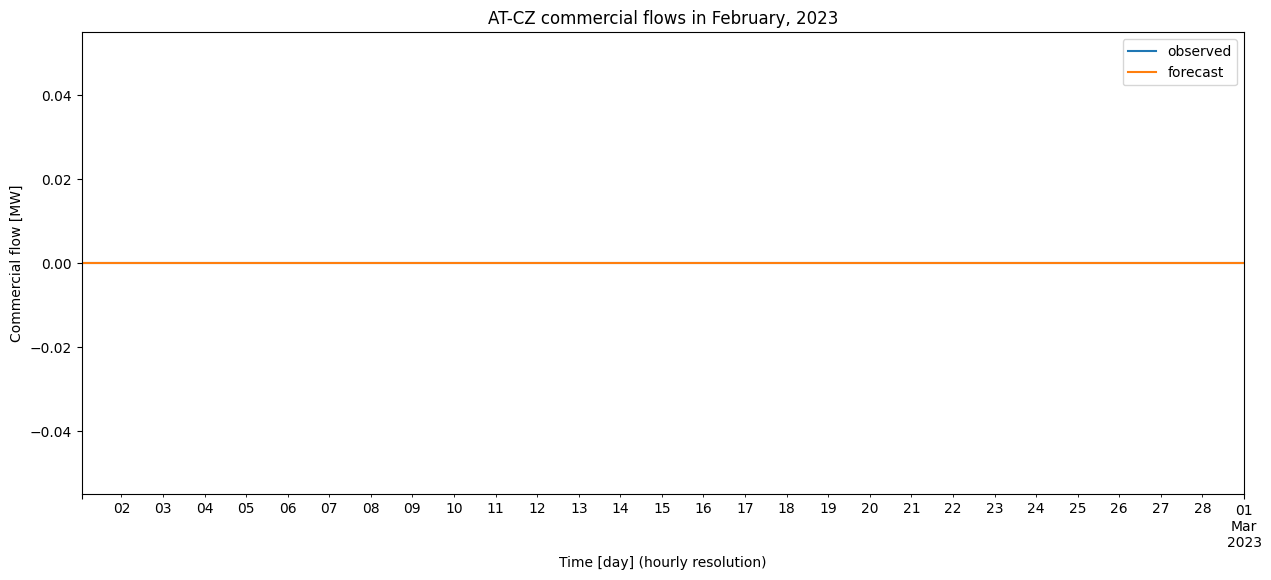

AT-DE


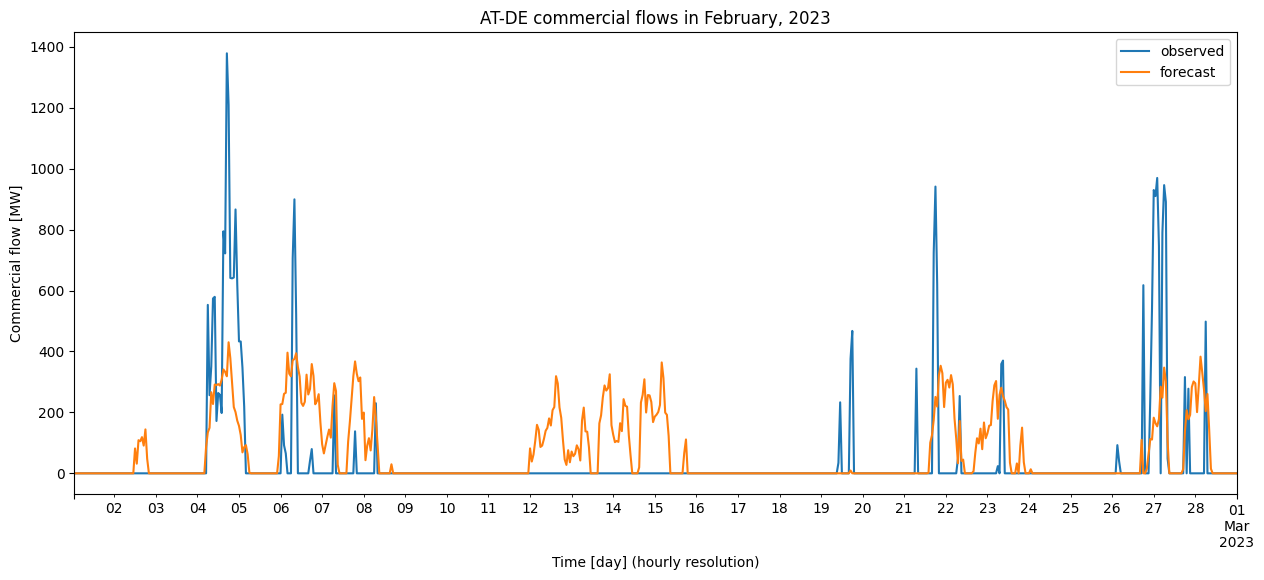

AT-HU


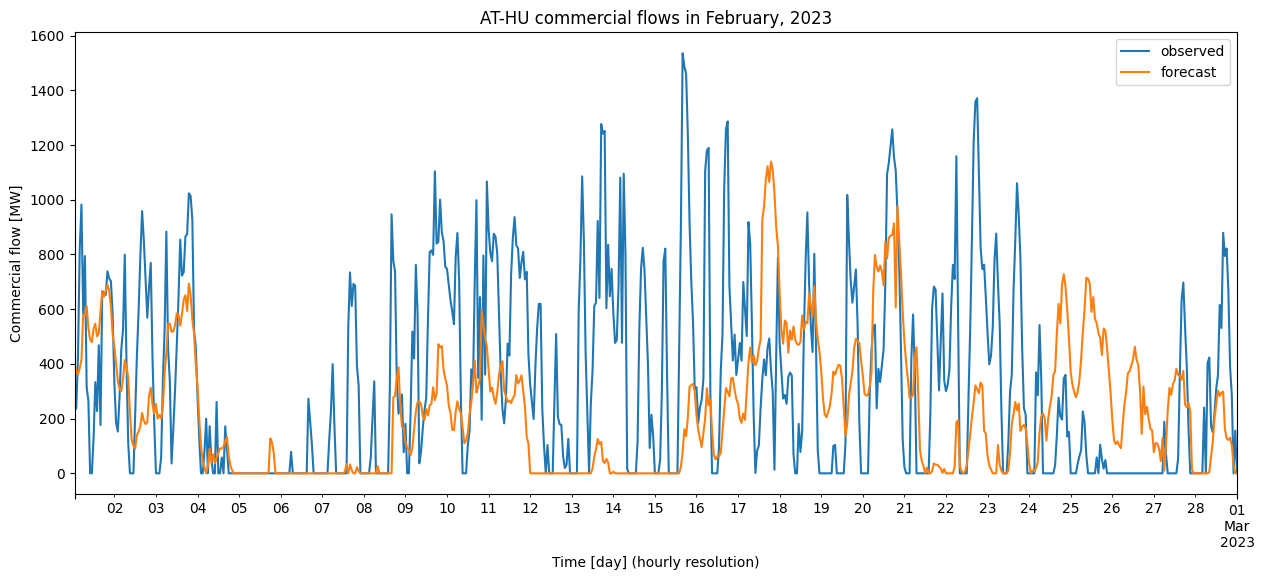

AT-SI


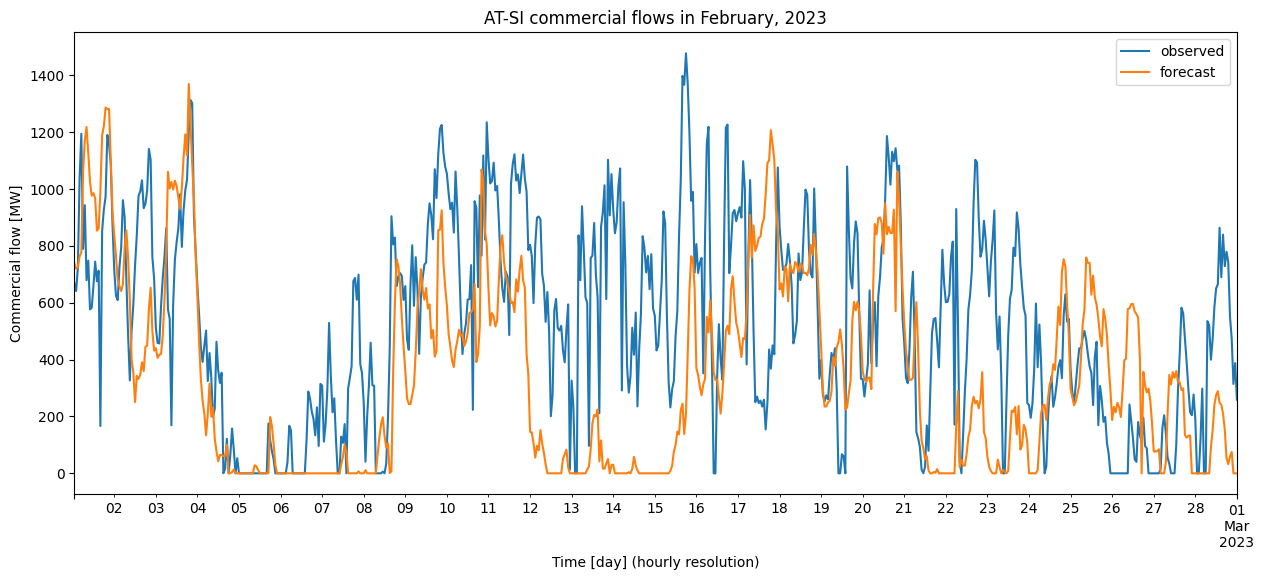

BE-FR


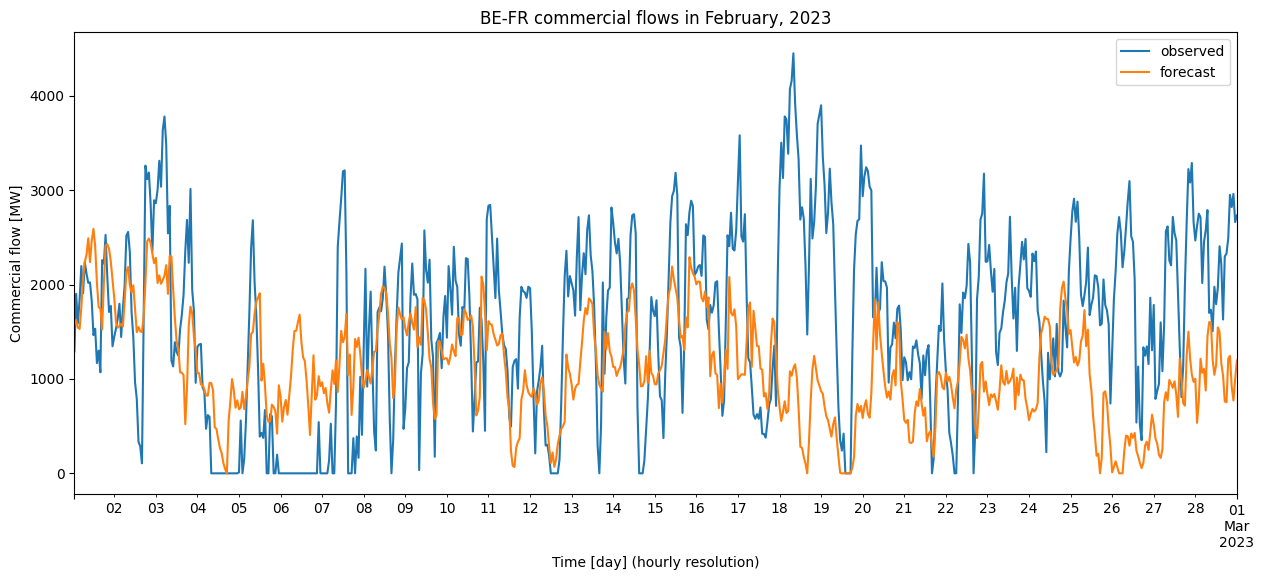

BE-NL


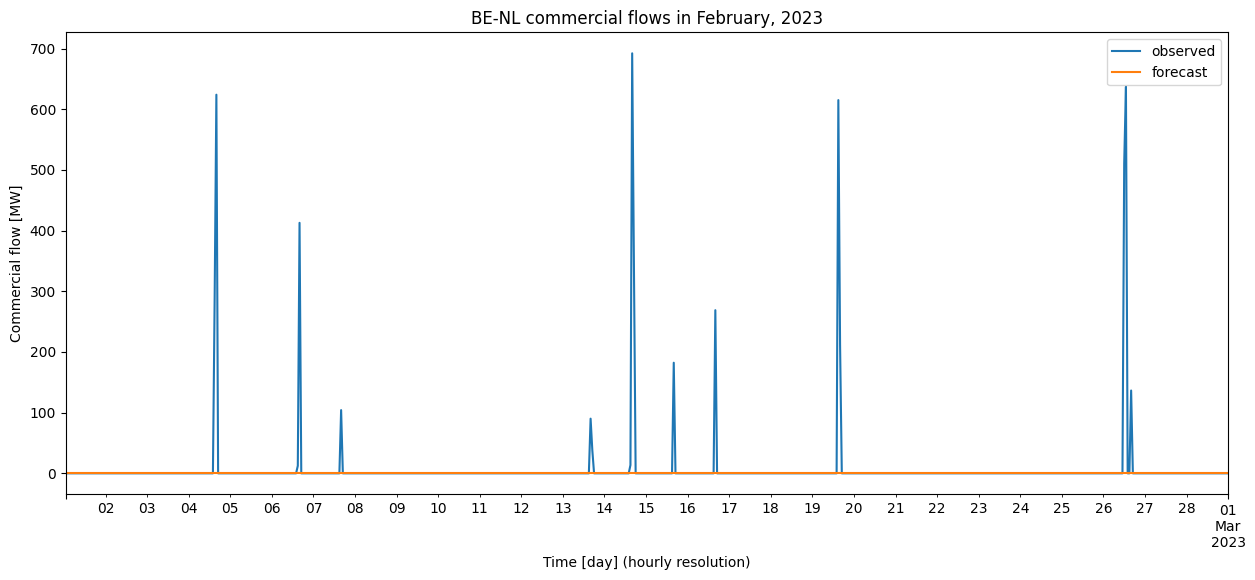

CZ-AT


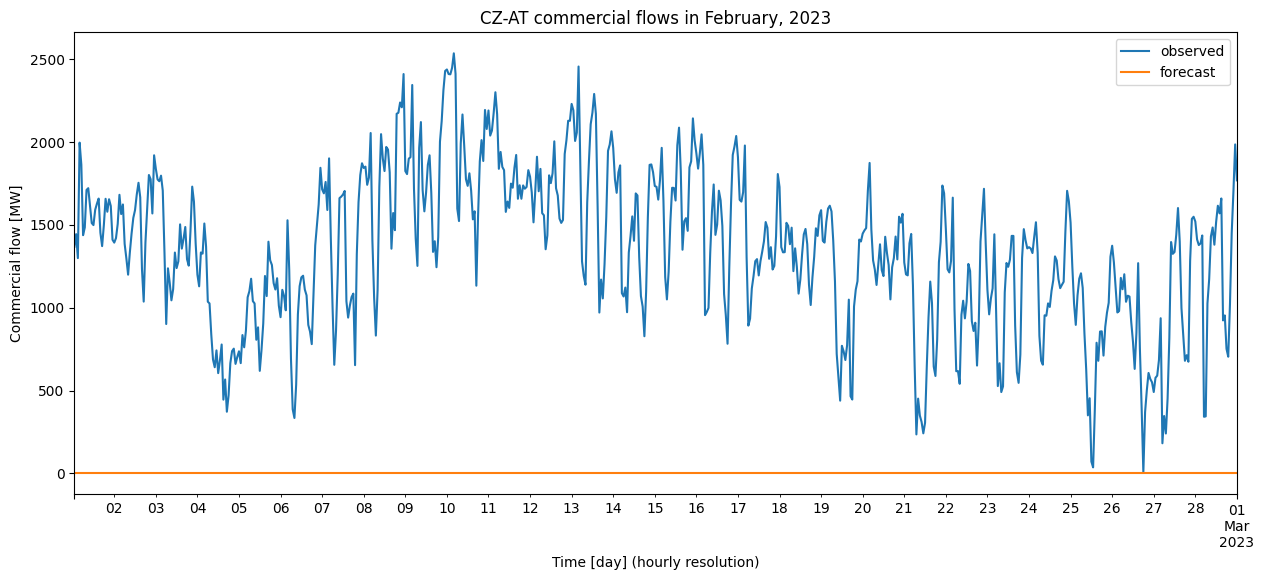

CZ-DE


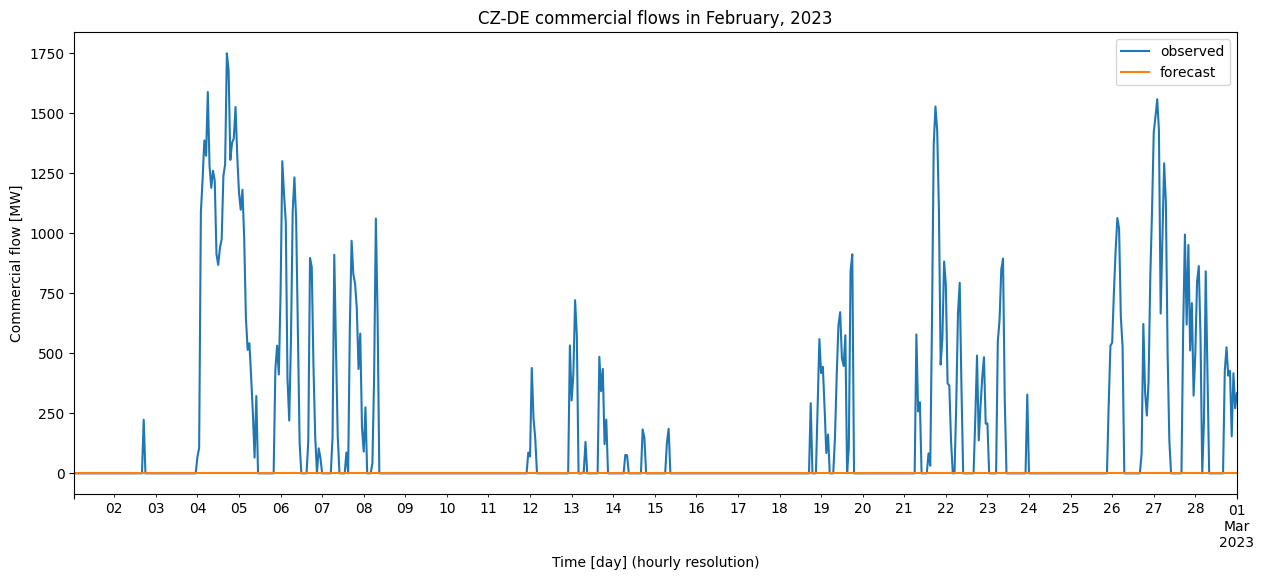

CZ-PL


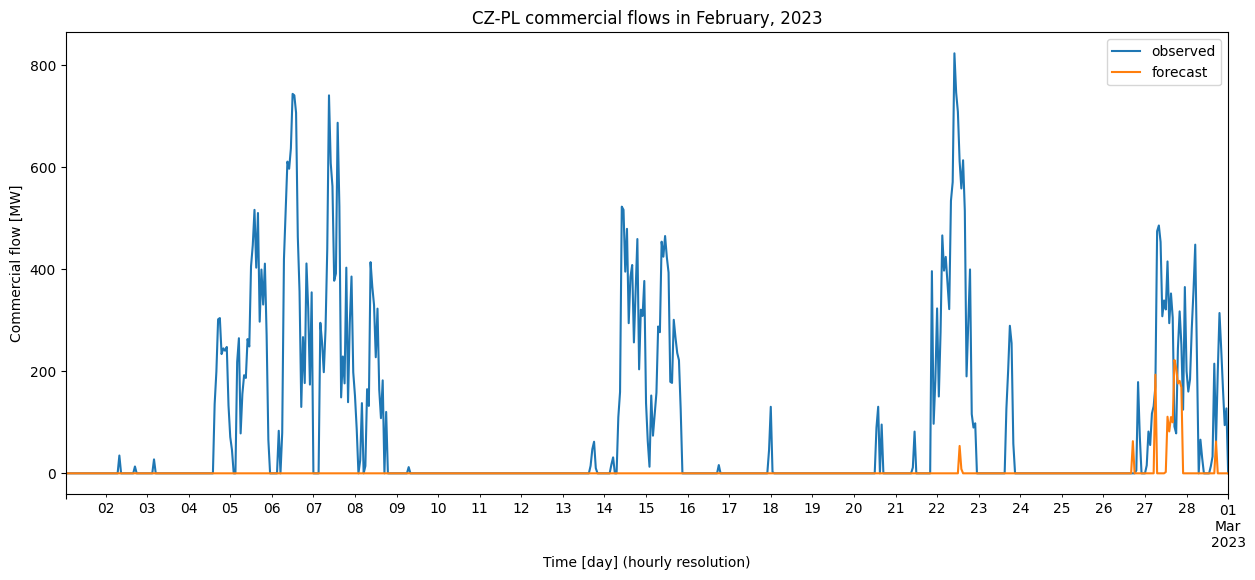

CZ-SK


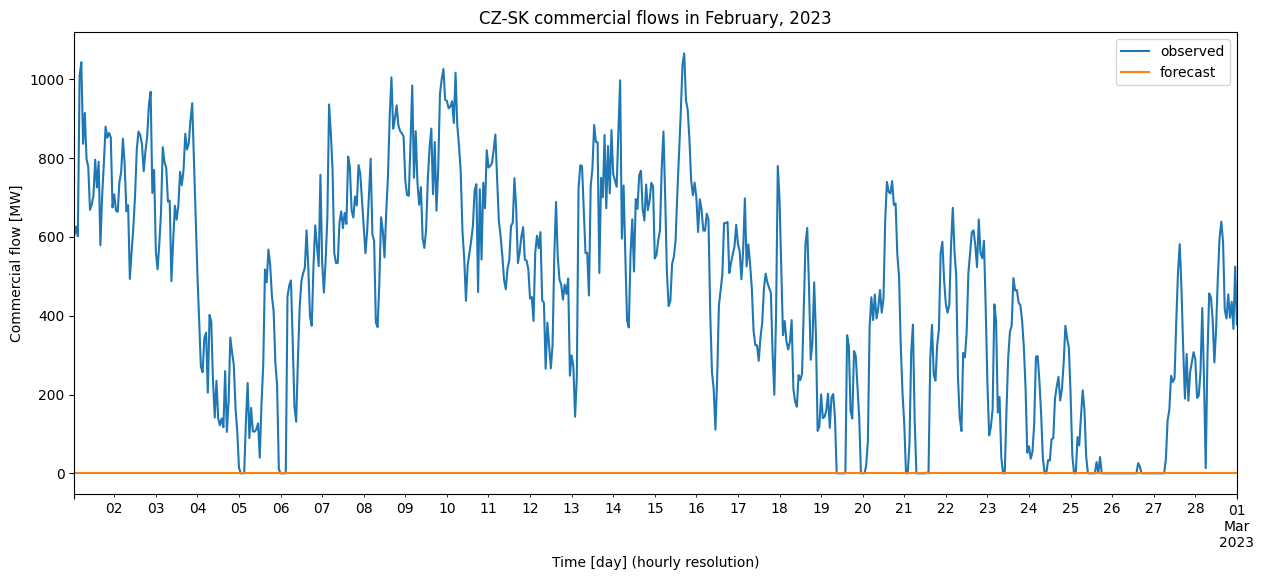

DE-AT


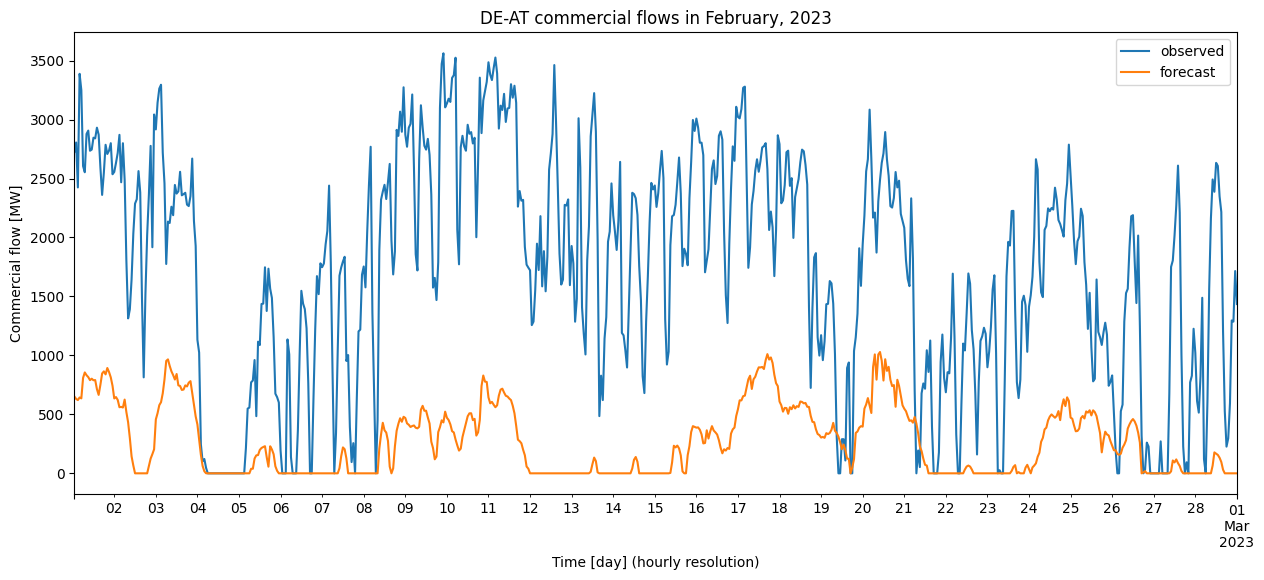

DE-CZ


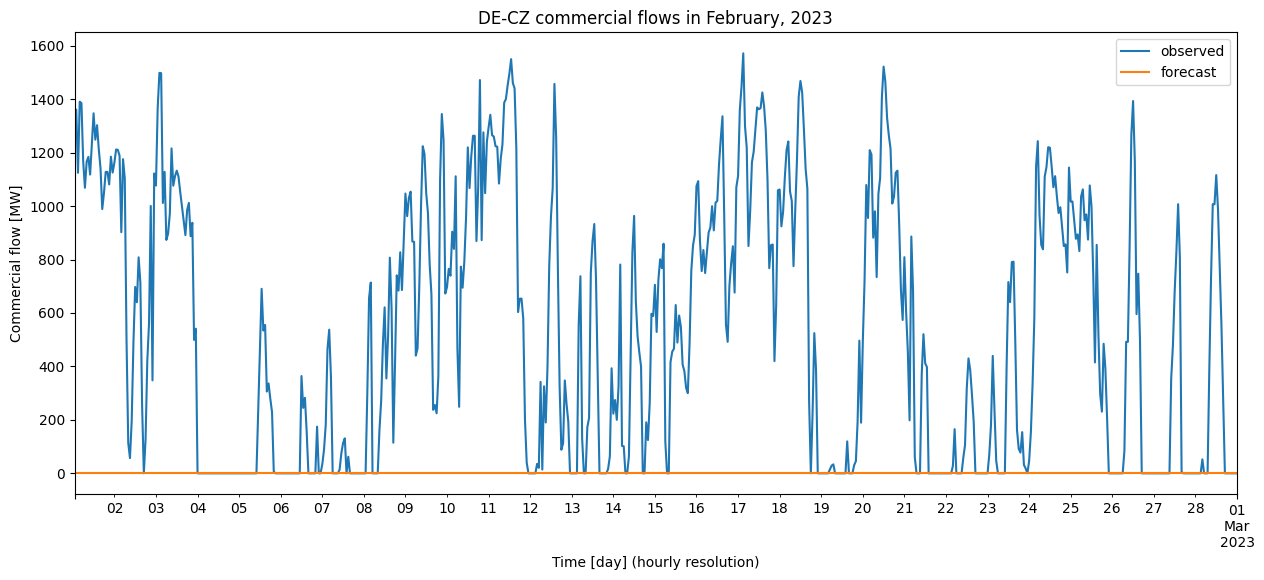

DE-FR


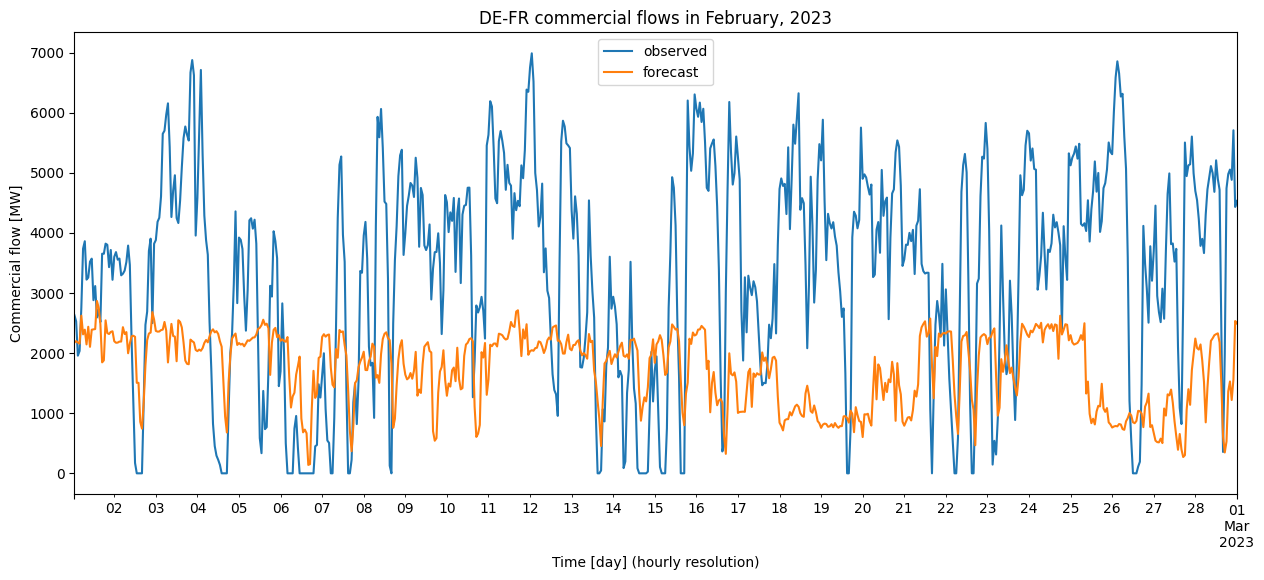

DE-NL


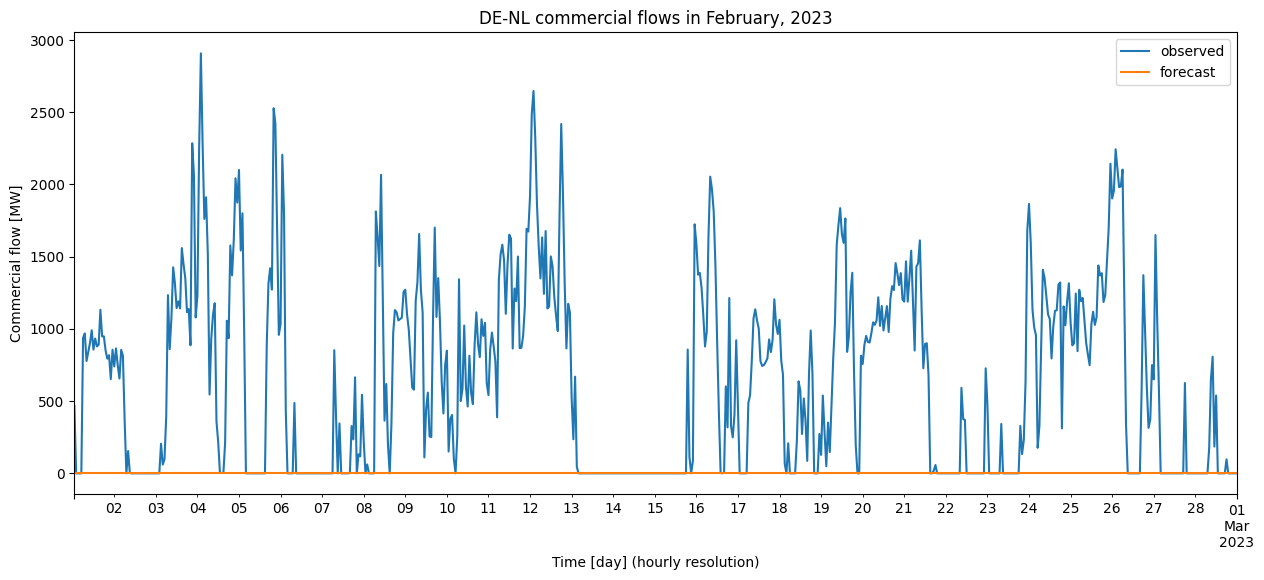

FR-BE


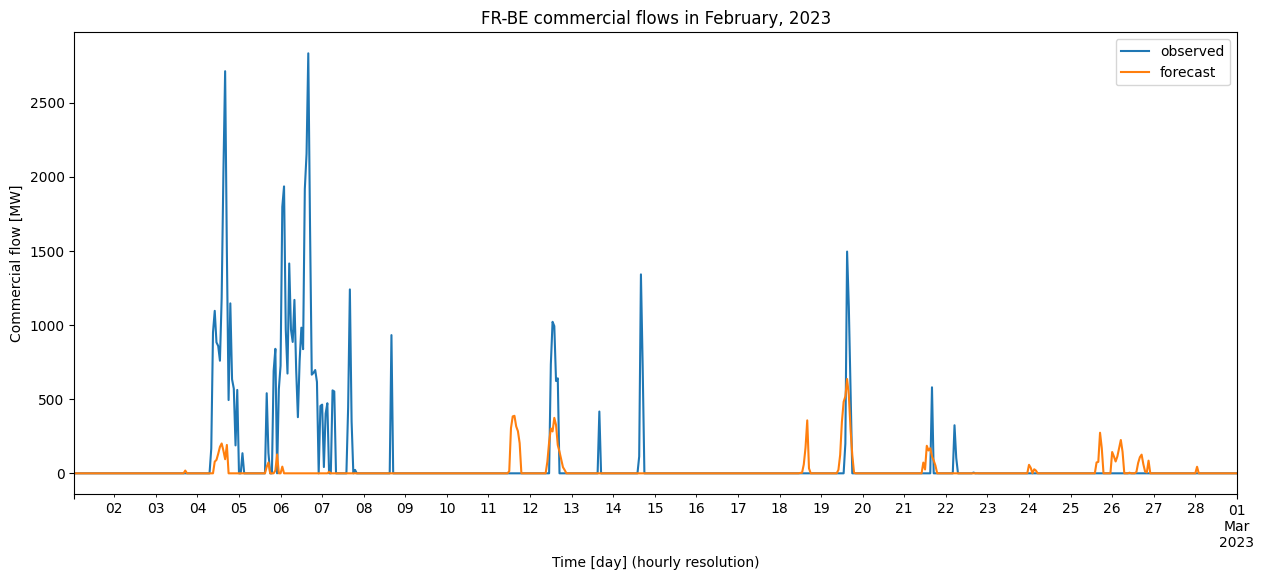

FR-DE


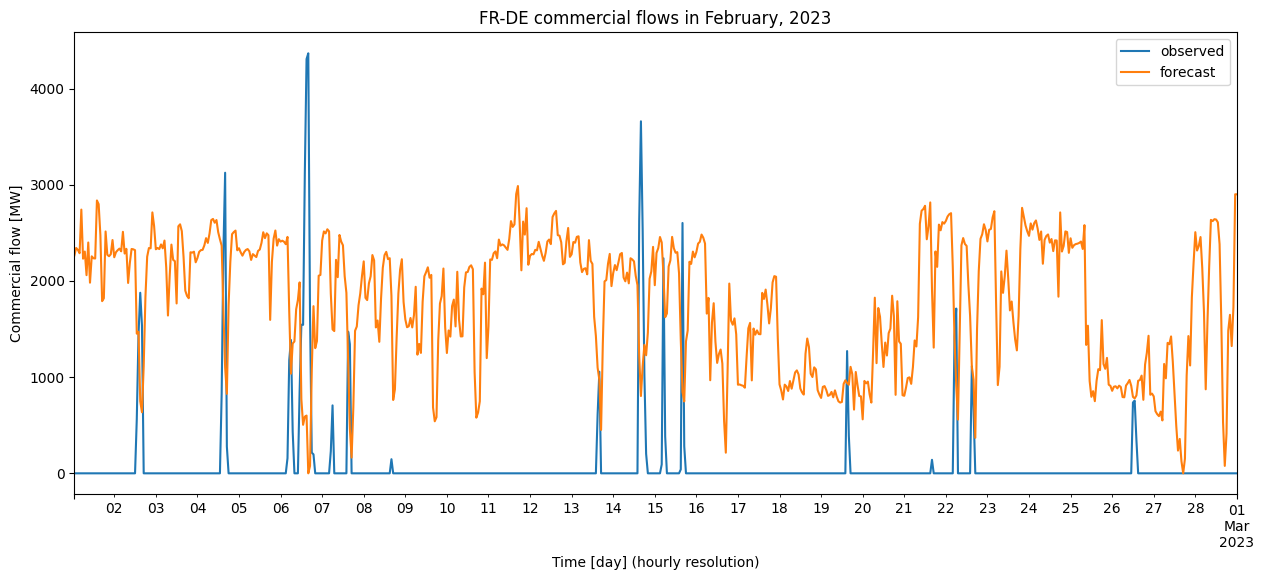

HR-HU


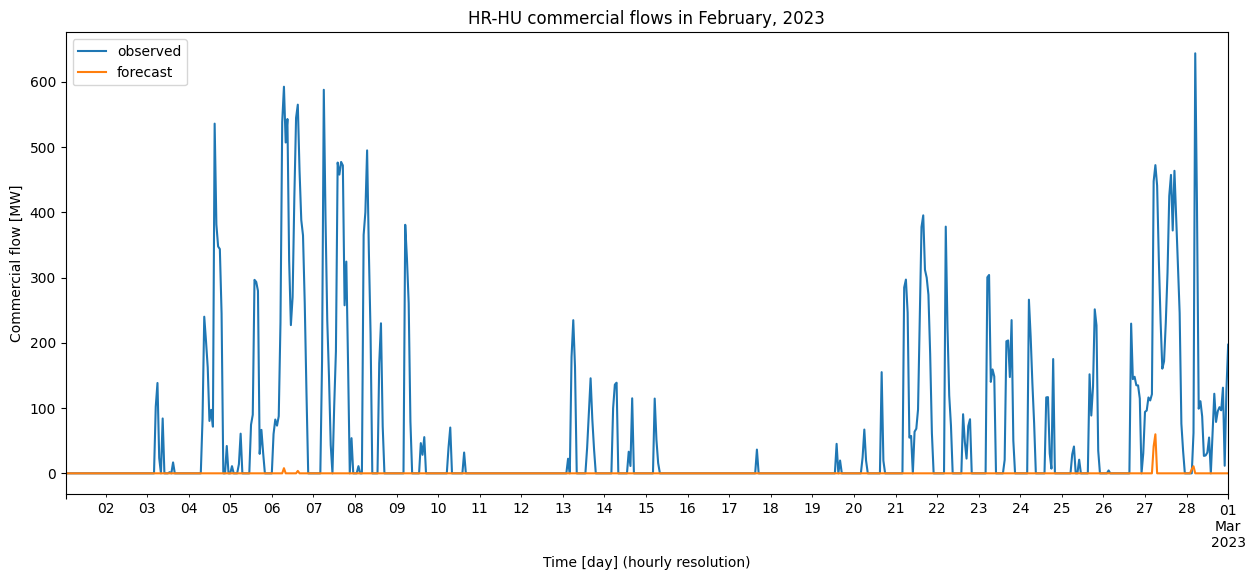

HR-SI


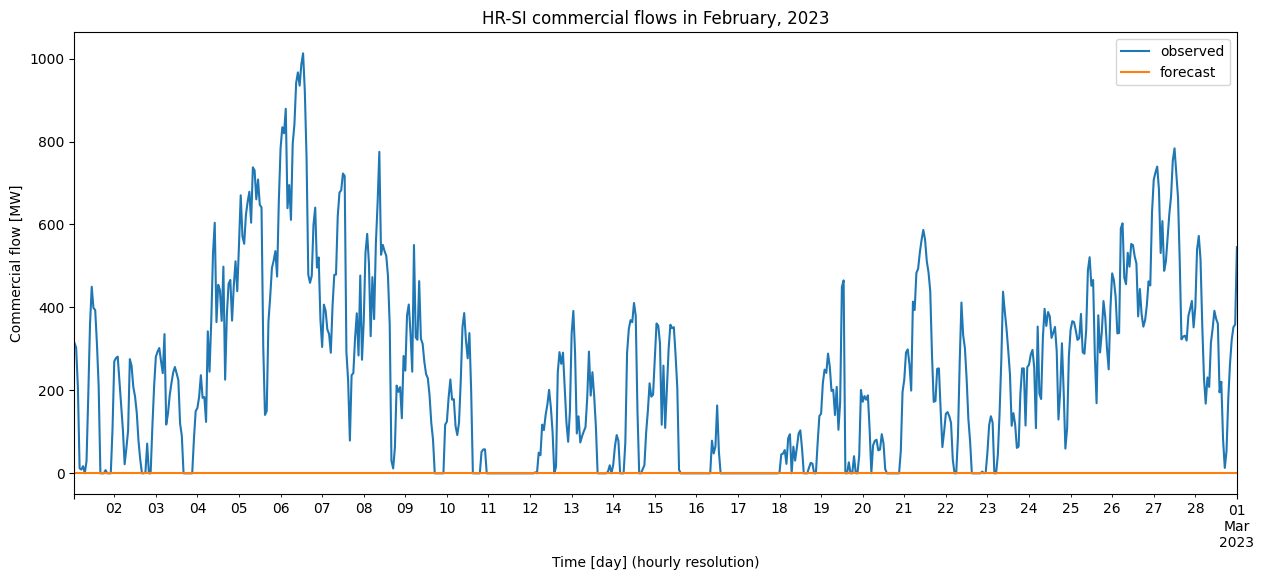

HU-AT


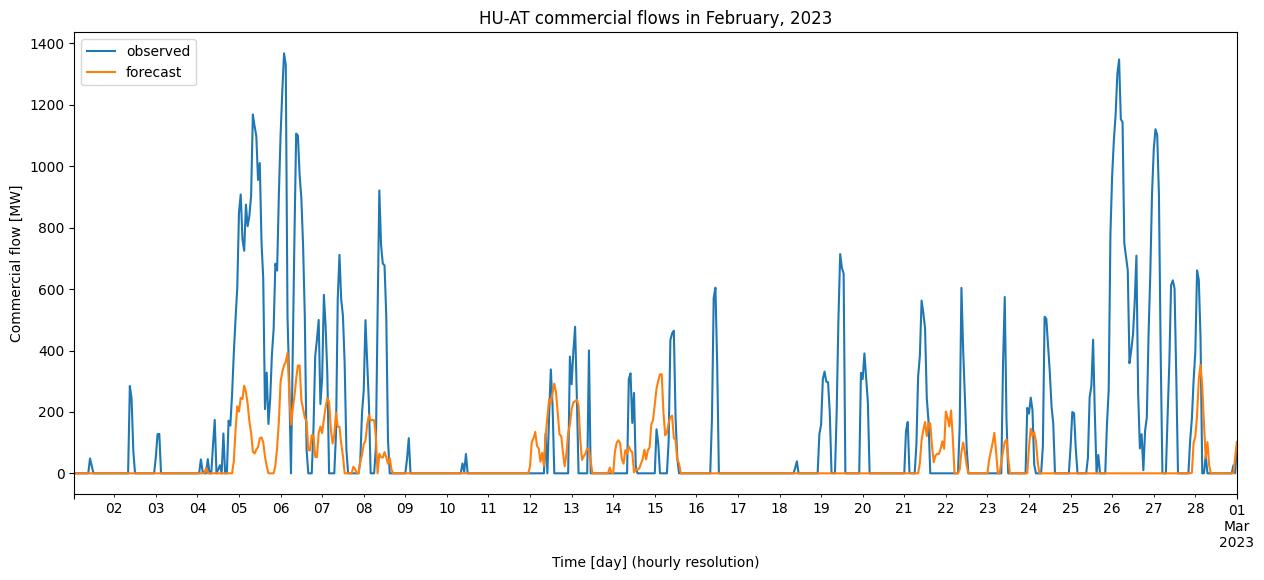

HU-HR


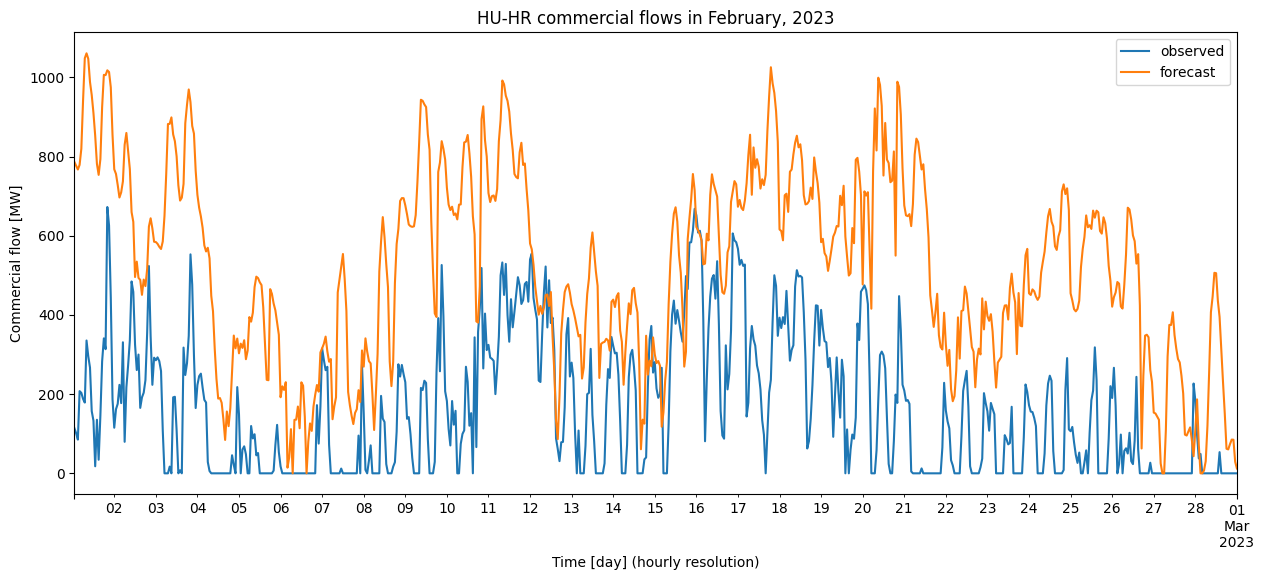

HU-SK


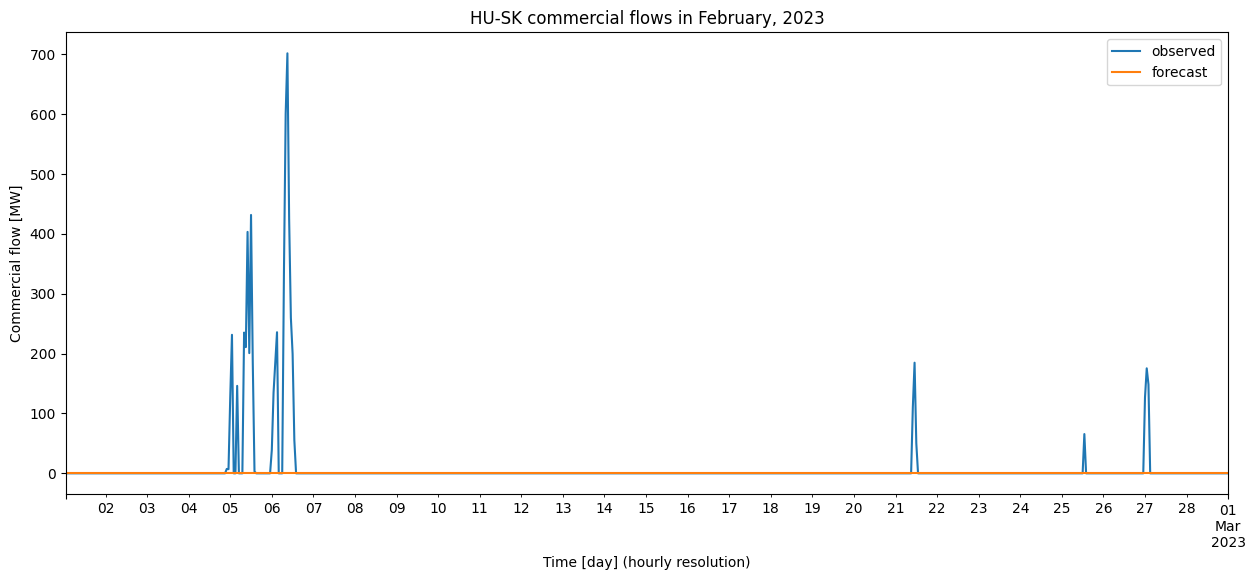

NL-BE


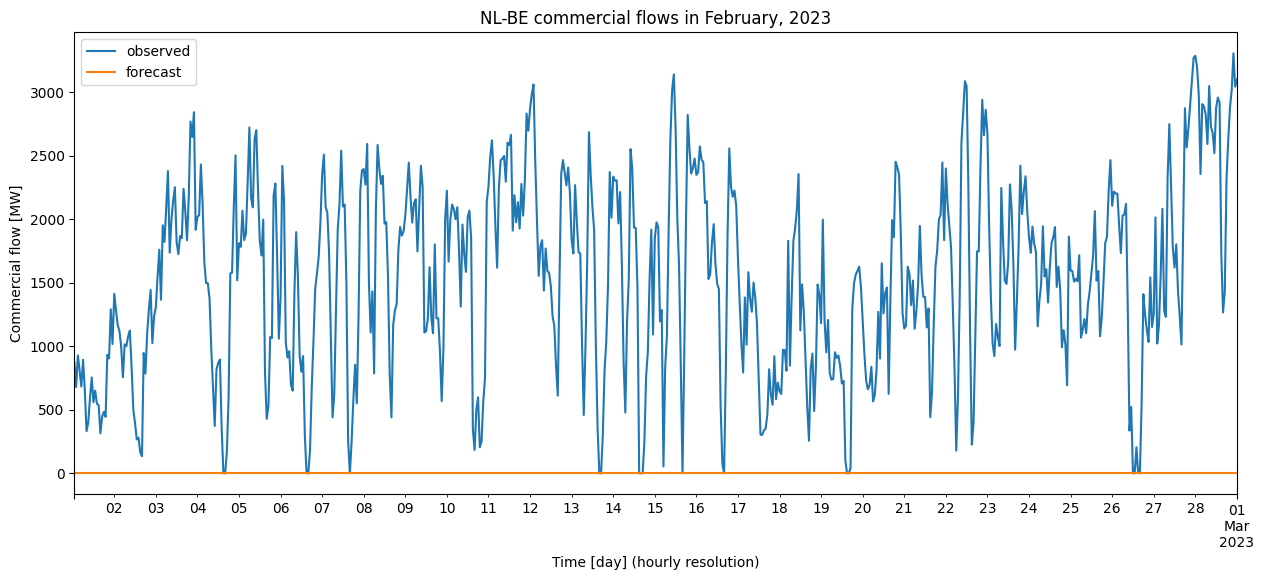

NL-DE


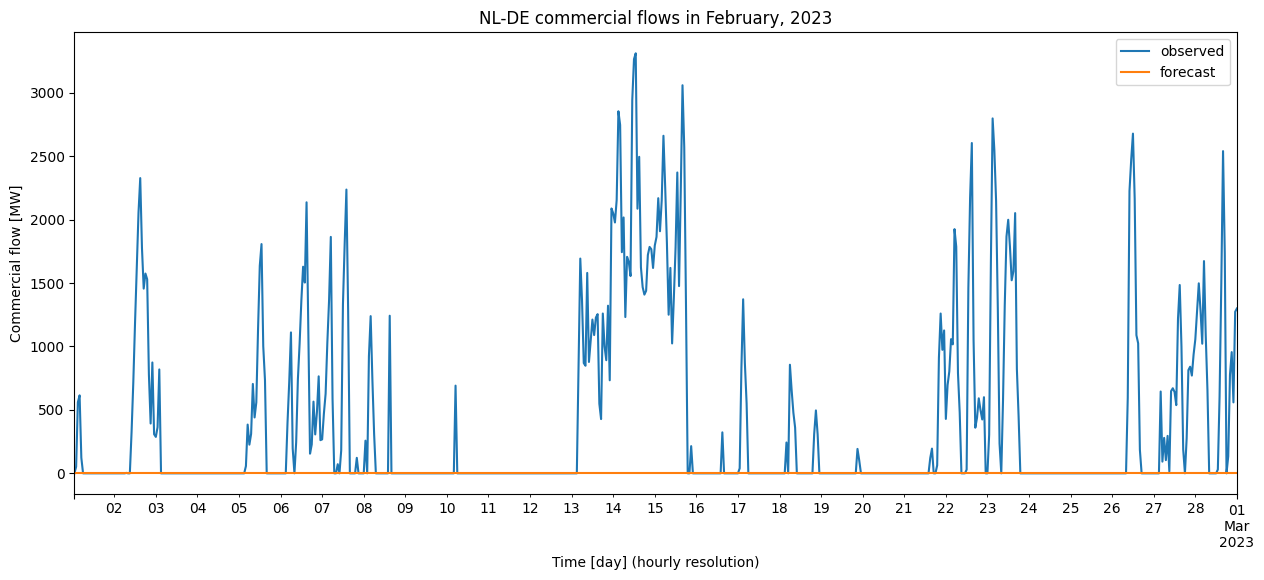

PL-CZ


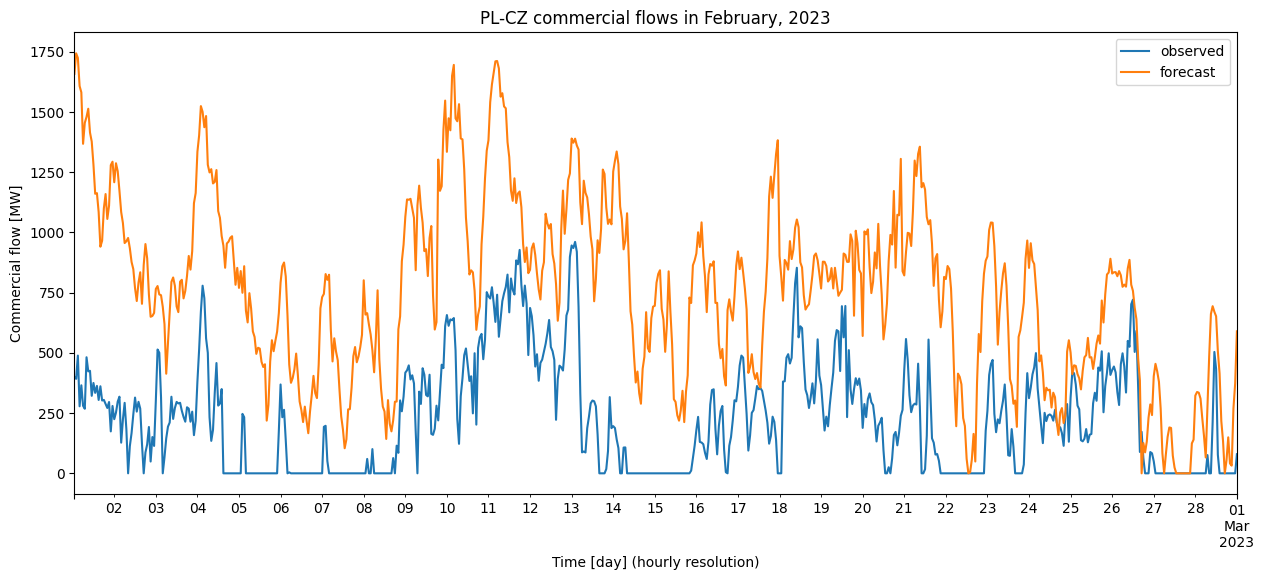

SI-AT


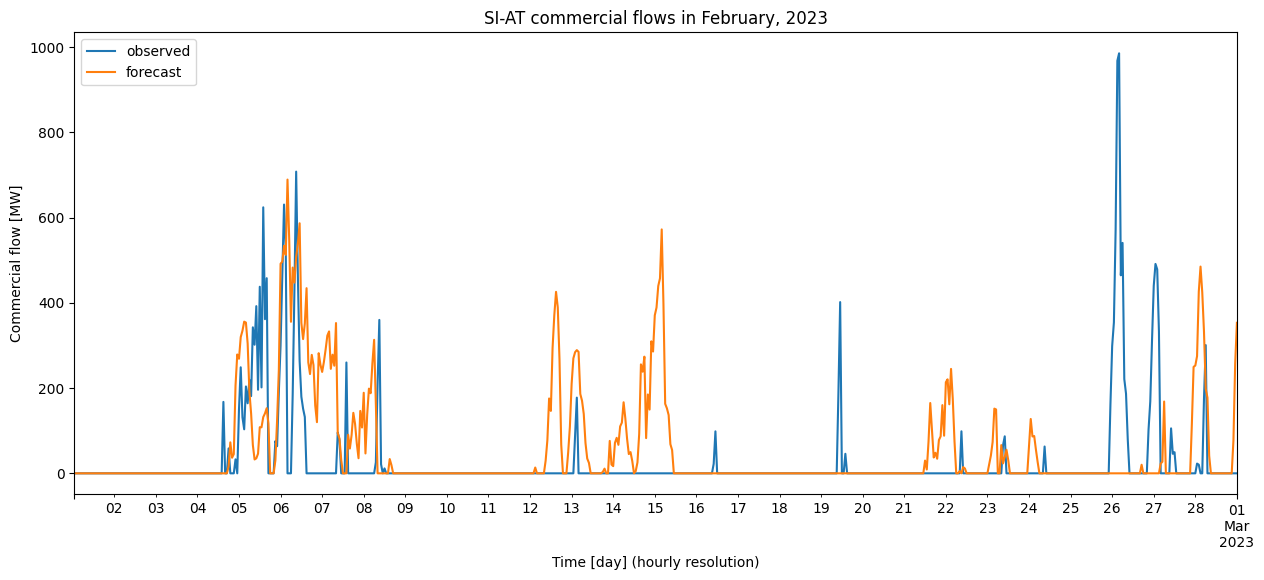

SI-HR


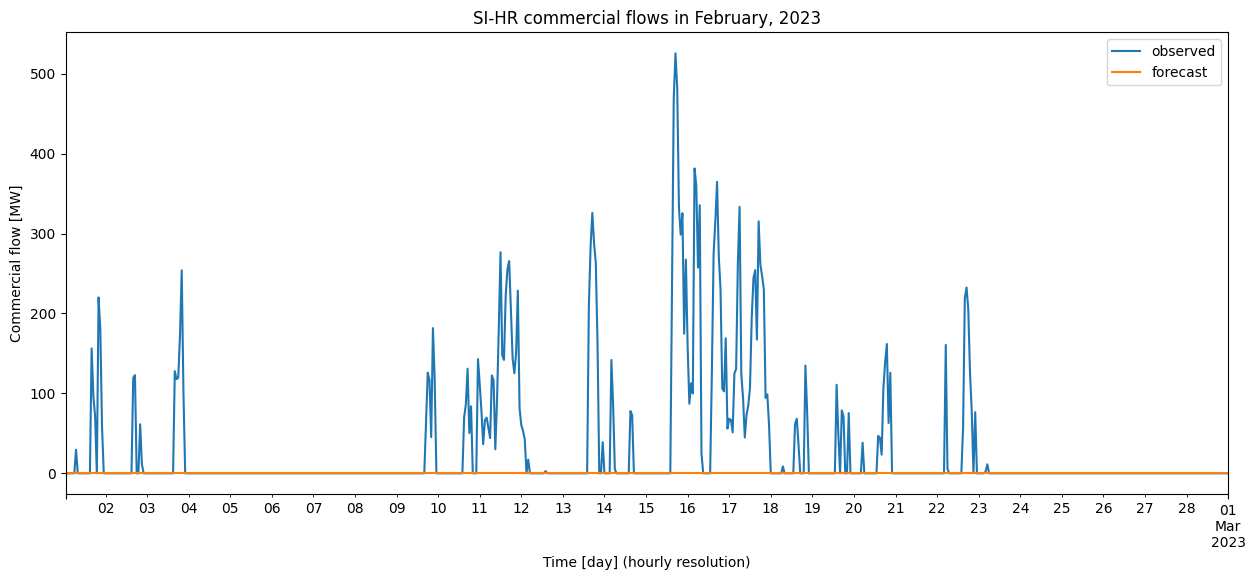

SK-CZ


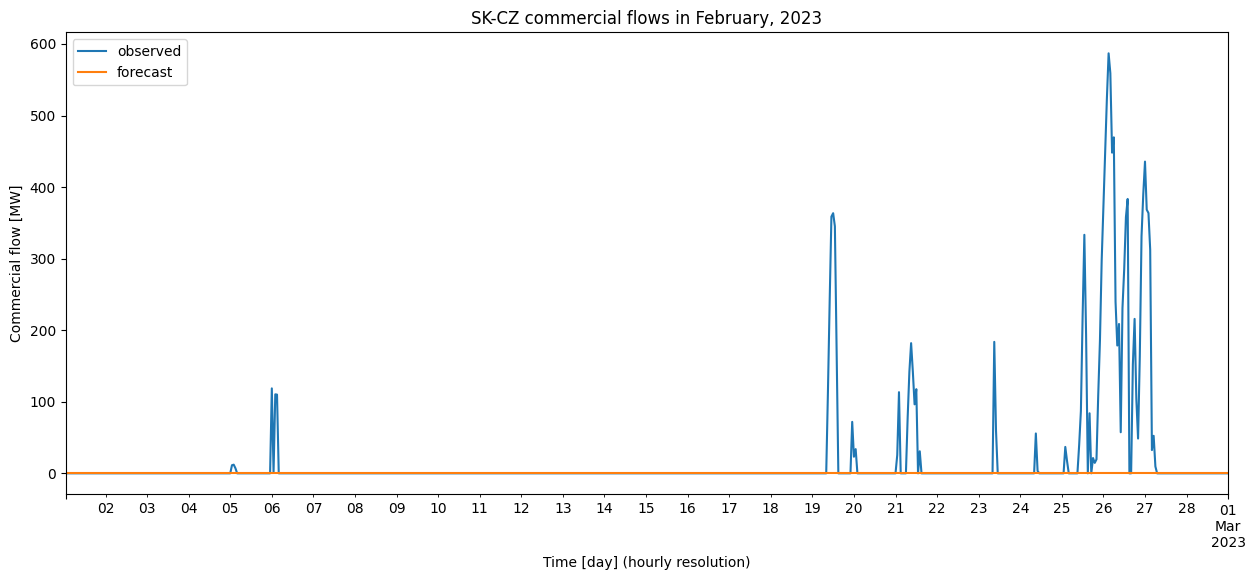

SK-HU


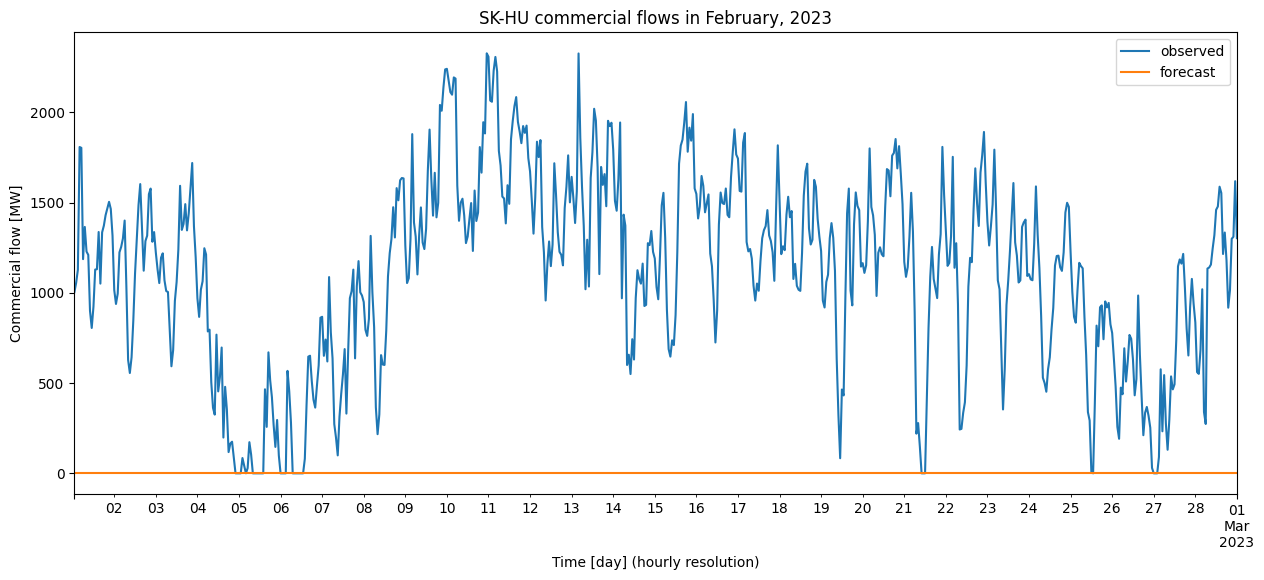

HU-RO


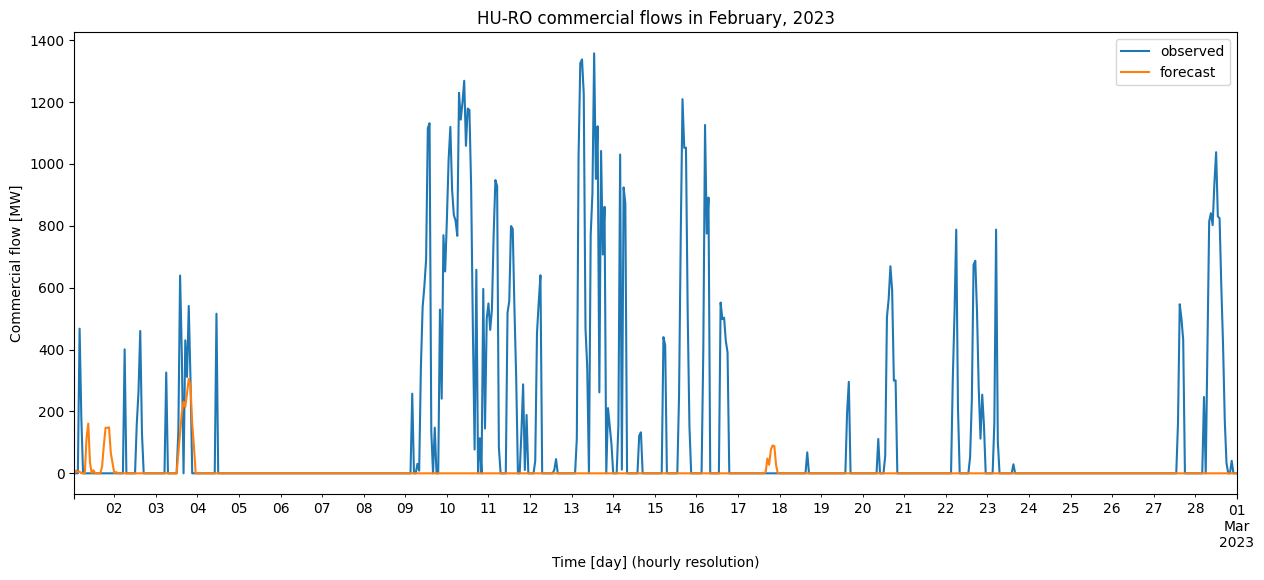

In [159]:
for border in border_flows.keys():
    plt.figure(figsize=(15,6))
    
    print(border)
    df_flow_forecast = df_np_forecast.copy()
    df_flow_forecast['flow_obs'] = border_flows_obs[border]
    df_flow_forecast['flow_calc'] = border_flows_calc[border]
    
    ax = df_flow_forecast['flow_obs'].plot()
    df_flow_forecast['flow_calc'].plot(ax=ax)
    
    plt.title("{0} commercial flows in February, 2023".format(border))
    plt.ylabel('Commercial flow [MW]')
    plt.xlabel('Time [day] (hourly resolution)')
    
    ax.legend([
        'observed', 'forecast'
    ])
    
    plt.show()